# Evaluation Project-9

# Project Name-Insurance Claims- Fraud Detection

# Problem Statement:
Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [3]:
df=pd.read_csv('Automobile_insurance_fraud.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


# EDA

In [4]:
#check first 5 rows
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [5]:
#check last 5 rows
df.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,11-11-1996,OH,250/500,1000,766.19,0,612260,...,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


In [6]:
#check the shape
df.shape

(1000, 40)

There are 1000 rows and 40 columns in our dataset.

In [7]:
#checking the columns
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

About Columns-
        There are 40 columns present in our dataset

In [8]:
#checking the datatypes
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

As we can see there are integer,object and float datatypes are present in the dataset

In [9]:
#checking information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

Observations-

We can see that the dataset contains mixture of categorical and numerical variables

Categorical variables have data type object

Numerical variables have data type folat64

21 feature are categorical and 19 are numerical.Our target variable is categorical

In [10]:
df.duplicated().sum()

0

No Duplicate Values

In [11]:
#Number of Unque values
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

Policy number and incident location are unique features and will not have any impact on the machine learning hence we will drop that column

In [12]:
#drop policy_number,incident_location
df.drop(['policy_number','incident_location'],axis=1,inplace=True)

In [13]:
df.police_report_available.unique()

array(['YES', '?', 'NO'], dtype=object)

In [14]:
df.replace('?',np.NaN,inplace=True)
df

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,...,NaN,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,...,NaN,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,05-01-2014,IL,100/300,1000,1436.79,0,608177,FEMALE,...,NaN,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


# DataImputation

In [15]:
#checking null values
df.isnull().sum()

months_as_customer                0
age                               0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage                 360
bodily_injuries                   0
witnesses                   

In [16]:
df.drop(['_c39'],axis=1,inplace=True)

In [17]:
df['collision_type'].unique()

array(['Side Collision', nan, 'Rear Collision', 'Front Collision'],
      dtype=object)

In [18]:
#We will use mode method to fill this Nan values
df['collision_type']=df['collision_type'].fillna(df['collision_type'].mode()[0])

In [19]:
#lets fill the null values for property_damage
df.property_damage.unique()

array(['YES', nan, 'NO'], dtype=object)

In [20]:
df['property_damage']=df['property_damage'].fillna(df['property_damage'].mode()[0])

In [21]:
#Lets fill the null values for police_report_available
df.police_report_available.unique()

array(['YES', nan, 'NO'], dtype=object)

In [22]:
df['police_report_available']=df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [23]:
#check missing values again
df.isnull().sum()

months_as_customer             0
age                            0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_cla

We imputed all missing values

In [24]:
#change to datetime
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])
df['Month']=pd.DatetimeIndex(df['policy_bind_date']).month
df['Year']=pd.DatetimeIndex(df['policy_bind_date']).year
df['Day']=df['policy_bind_date'].dt.day

In [25]:
#drop policy_bind_date
df.drop(['policy_bind_date'],axis=1,inplace=True)
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Month,Year,Day
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,...,6510,13020,52080,Saab,92x,2004,Y,10,2014,17
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,...,780,780,3510,Mercedes,E400,2007,Y,6,2006,27
2,134,29,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,...,7700,3850,23100,Dodge,RAM,2007,N,6,2000,9
3,256,41,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,...,6340,6340,50720,Chevrolet,Tahoe,2014,Y,5,1990,25
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,...,1300,650,4550,Accura,RSX,2009,N,6,2014,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,...,17440,8720,61040,Honda,Accord,2006,N,7,1991,16
996,285,41,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,...,18080,18080,72320,Volkswagen,Passat,2015,N,5,2014,1
997,130,34,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,...,7500,7500,52500,Suburu,Impreza,1996,N,2,2003,17
998,458,62,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,...,5220,5220,36540,Audi,A5,1998,N,11,2011,18


# Descriptive Statistics

In [26]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00
number_of_vehicles_involved,1000.0,1.839000e+00,1.018880e+00,1.00,1.0000,1.0,3.000,4.00


Observation:
    
Data is from year1990 to 2015

Minimum age of the customer is 19 and max is 64

Customer who has claimed insurance is maximum 479 months

Minimum claim amount given is 100 and maximum is 114920

We have minimum of 1 witness and max 3

Vehicle claim is minimum 70 and maximum is 79560

# Data Visualization

# Univariate Analysis

<AxesSubplot:ylabel='fraud_reported'>

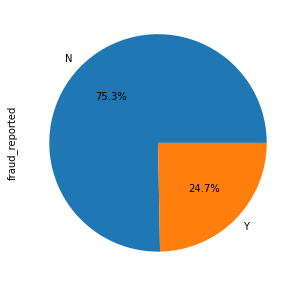

In [27]:
df['fraud_reported'].value_counts().plot.pie(figsize=(5,5),autopct='%.1f%%')

Around 24% of claims were found as fraud.

<AxesSubplot:ylabel='police_report_available'>

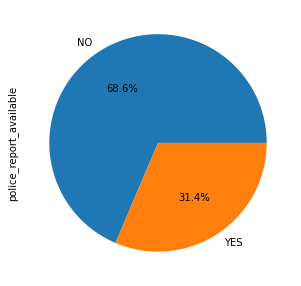

In [28]:
df['police_report_available'].value_counts().plot.pie(figsize=(5,5),autopct='%.1f%%')

We have 31.4% of the case where Police report is available

<AxesSubplot:ylabel='insured_sex'>

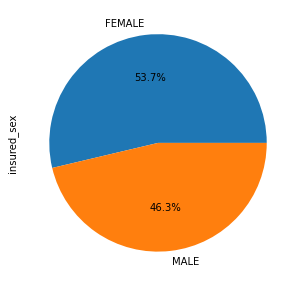

In [29]:
df['insured_sex'].value_counts().plot.pie(figsize=(5,5),autopct='%.1f%%')

53.7% cases reported for claim are of female

<AxesSubplot:ylabel='incident_type'>

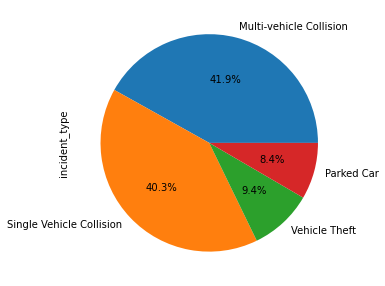

In [30]:
df['incident_type'].value_counts().plot.pie(figsize=(5,5),autopct='%.1f%%')

41.9% and 40.3% of the claims reported are of Multiple and Single vehicle collission

<AxesSubplot:ylabel='authorities_contacted'>

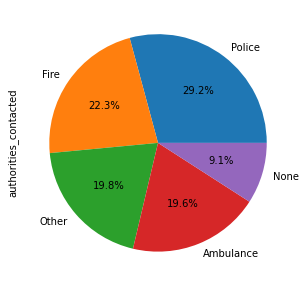

In [31]:
df['authorities_contacted'].value_counts().plot.pie(figsize=(5,5),autopct='%.1f%%')

29.2% of the claimers have contacted police.Only 9.1% have contacted no authorities

<AxesSubplot:ylabel='witnesses'>

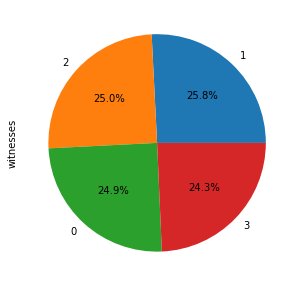

In [32]:
df['witnesses'].value_counts().plot.pie(figsize=(5,5),autopct='%.1f%%')

Number of witnesses are equally distributed

<AxesSubplot:ylabel='incident_state'>

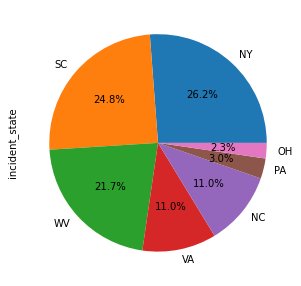

In [33]:
df['incident_state'].value_counts().plot.pie(figsize=(5,5),autopct='%.1f%%')

Majority of the claims are reported from state NY,SC and WV

<AxesSubplot:ylabel='incident_city'>

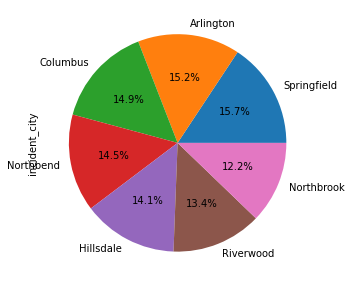

In [34]:
df['incident_city'].value_counts().plot.pie(figsize=(5,5),autopct='%.1f%%')

Majority of the claims are reported from city Springfiled and Arlington

<AxesSubplot:ylabel='Month'>

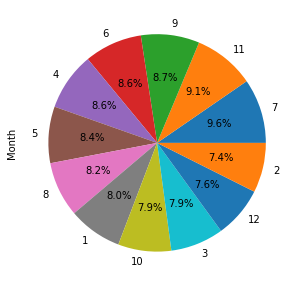

In [35]:
df['Month'].value_counts().plot.pie(figsize=(5,5),autopct='%.1f%%')

Most of the incidents were reported either in July or Nov.Least cases are reported in Feb

# Bivariate Analysis

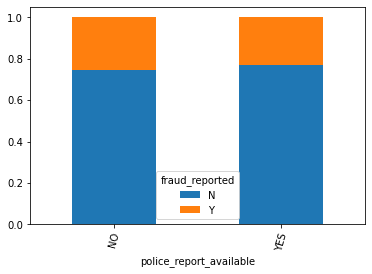

In [36]:
ct=pd.crosstab(df.police_report_available,df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

There are many cases where police report is not available and it increase the chances of fraud

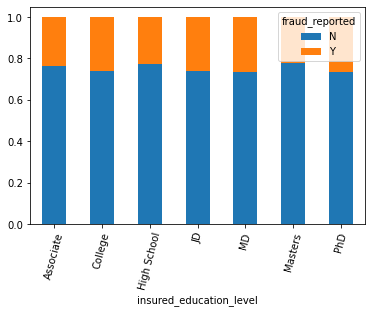

In [37]:
ct=pd.crosstab(df.insured_education_level,df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

There is not much relation between education level and person doing fraud

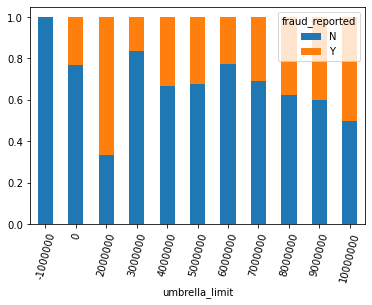

In [38]:
ct=pd.crosstab(df.umbrella_limit,df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

Having umbrella unit of 2000000 increases the chance of insurance fraud

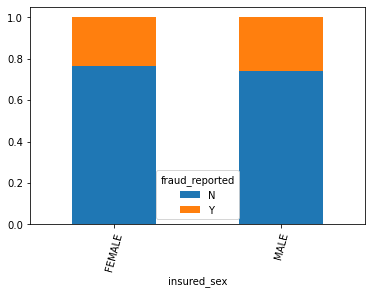

In [39]:
ct=pd.crosstab(df.insured_sex,df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

Sex has no relation with the Fraud

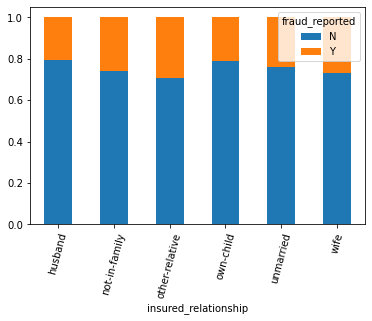

In [40]:
ct=pd.crosstab(df.insured_relationship,df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

Insured relationship other -relative has higher chance of fraud

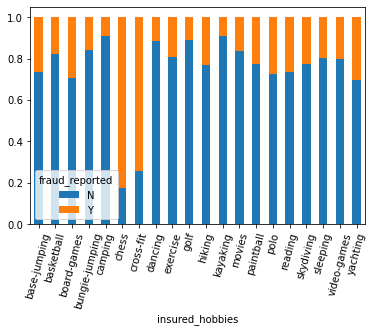

In [41]:
ct=pd.crosstab(df.insured_hobbies,df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

People who has chess and crossfit as hobbies are most likely that their claim is fraud

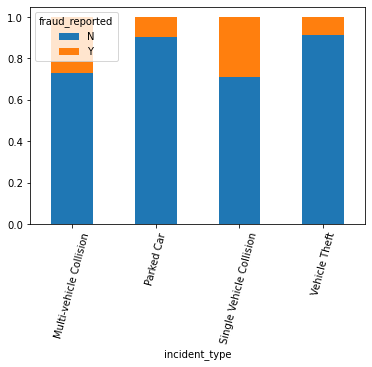

In [42]:
ct=pd.crosstab(df.incident_type,df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

Incident type of Parked car and vehicle theft has less chance that the claim is fraud.

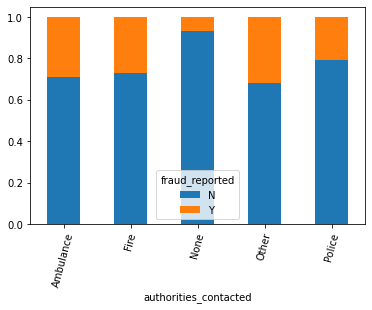

In [43]:
ct=pd.crosstab(df.authorities_contacted,df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

Chances of fraud claim is less if None of the authorities are contacted.It increase if 'Other' is the category of authorities.

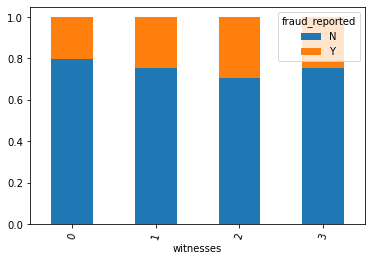

In [44]:
ct=pd.crosstab(df.witnesses,df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

Fraud claim is likely if having 2 witnesses

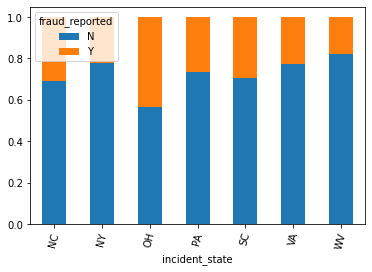

In [45]:
ct=pd.crosstab(df.incident_state,df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

In [46]:
NY and WV have least chance that the claim is fraud

SyntaxError: invalid syntax (Temp/ipykernel_5964/4227431654.py, line 1)

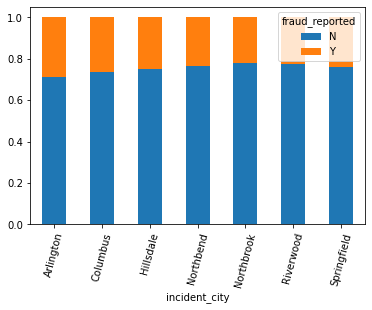

In [47]:
ct=pd.crosstab(df.incident_city,df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

Chances of fraud claim is likely in city of Arlington and Columbus

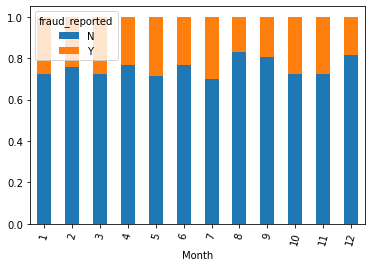

In [48]:
ct=pd.crosstab(df.Month,df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

No such strong relation between months and fraud claim.

Histogram

array([[<AxesSubplot:title={'center':'months_as_customer'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'policy_deductable'}>,
        <AxesSubplot:title={'center':'policy_annual_premium'}>],
       [<AxesSubplot:title={'center':'umbrella_limit'}>,
        <AxesSubplot:title={'center':'insured_zip'}>,
        <AxesSubplot:title={'center':'capital-gains'}>,
        <AxesSubplot:title={'center':'capital-loss'}>],
       [<AxesSubplot:title={'center':'incident_hour_of_the_day'}>,
        <AxesSubplot:title={'center':'number_of_vehicles_involved'}>,
        <AxesSubplot:title={'center':'bodily_injuries'}>,
        <AxesSubplot:title={'center':'witnesses'}>],
       [<AxesSubplot:title={'center':'total_claim_amount'}>,
        <AxesSubplot:title={'center':'injury_claim'}>,
        <AxesSubplot:title={'center':'property_claim'}>,
        <AxesSubplot:title={'center':'vehicle_claim'}>],
       [<AxesSubplot:title={'center':'auto_year'}>,
        <AxesSu

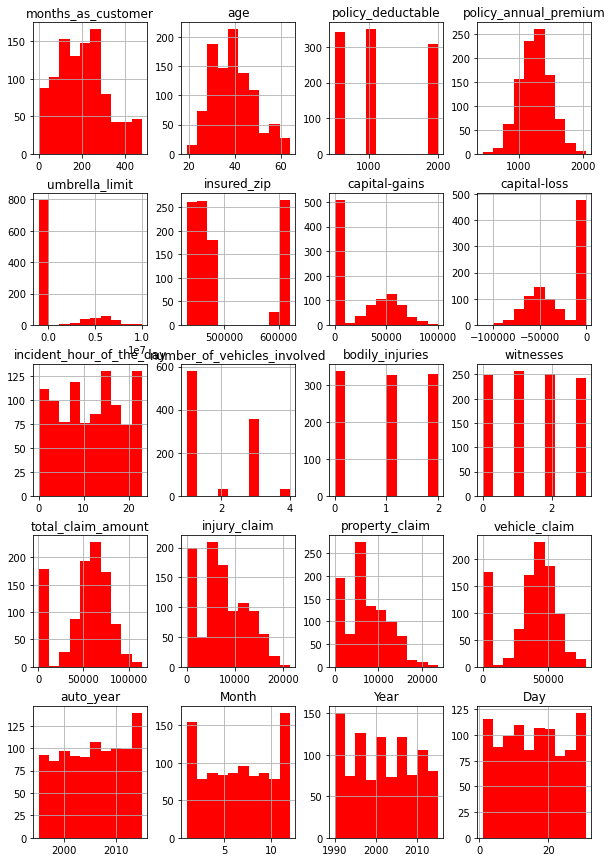

In [49]:
df.hist(figsize=(10,15),color='red')

Most of the data is normally distributed

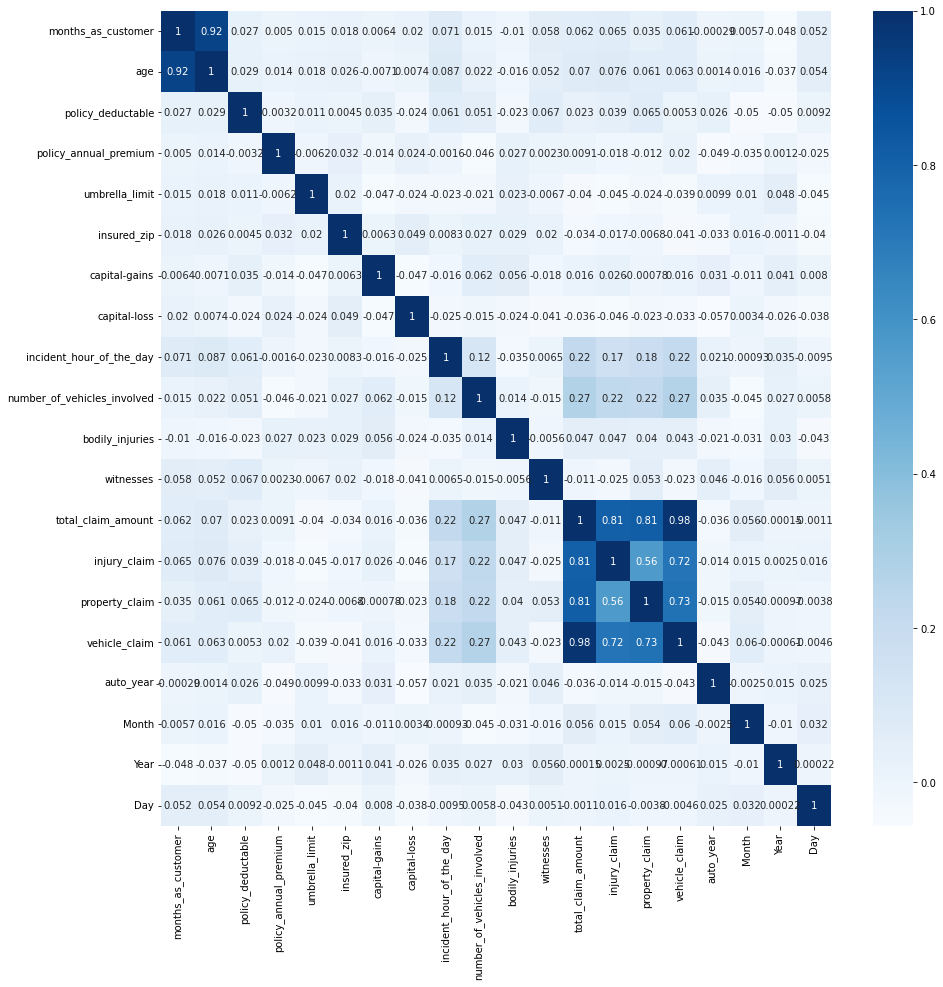

In [50]:
cor=df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(cor,annot=True,cmap='Blues')
plt.show()

Total claim amount,injury_claim,property_claim and highly correlated with each other

# Preprocessing Pipeline

# Outliers Detection

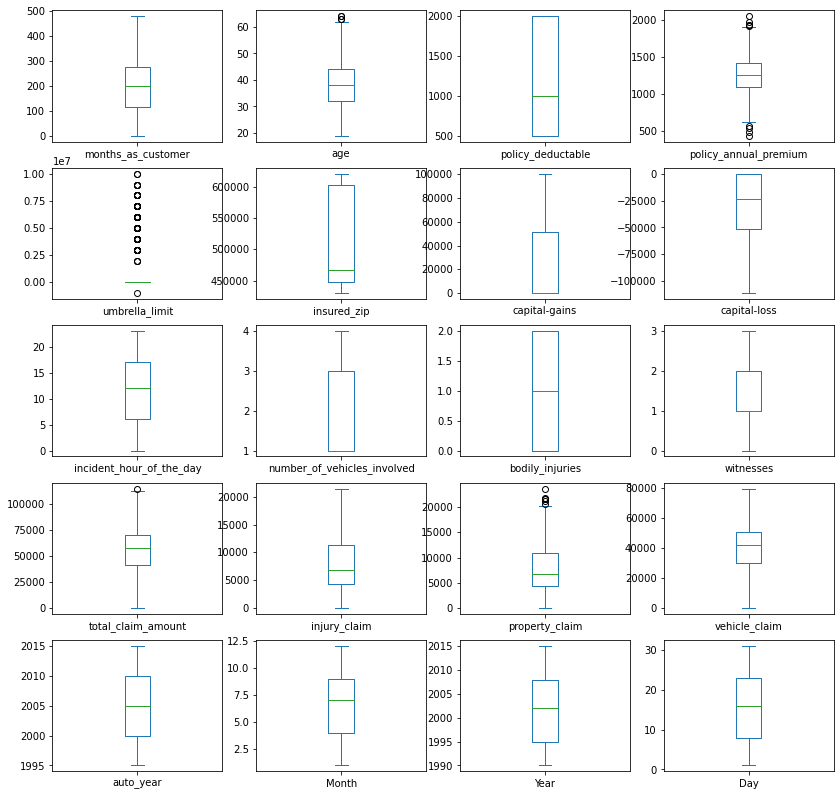

In [51]:
df.plot(kind='box',subplots=True,layout=(5,4),figsize=(14,14))
plt.show()

Umbrella limit and property claim has outliers present

# Outlier Removal

In [52]:
df[df["property_claim"]>20000]

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Month,Year,Day
163,112,30,OH,500/1000,1000,1166.54,0,479852,FEMALE,Masters,...,10790,21580,75530,Dodge,Neon,1997,Y,9,2002,13
299,119,27,IN,250/500,2000,1097.64,0,614812,MALE,High School,...,7080,21240,35400,Accura,TL,2006,N,5,1997,8
301,107,31,IL,100/300,2000,1018.73,5000000,469646,MALE,Associate,...,14420,21630,57680,Honda,CRV,2001,N,11,1994,25
421,147,37,IN,250/500,1000,1306.78,0,466818,MALE,MD,...,13520,20280,47320,Toyota,Camry,1995,N,2,1992,10
500,1,29,OH,500/1000,500,854.58,0,612826,FEMALE,JD,...,7890,23670,55230,Honda,CRV,2003,N,5,2006,24
591,43,43,IL,500/1000,500,1320.39,0,604861,FEMALE,Associate,...,7270,21810,50890,Honda,CRV,1996,Y,7,1997,11
687,194,41,IL,250/500,500,1203.81,0,613119,MALE,JD,...,13700,20550,61650,Saab,95,1999,N,2,1993,15
745,258,41,IL,100/300,500,1042.25,0,601206,MALE,Masters,...,6770,20310,54160,Mercedes,C300,2008,Y,2,2001,15


In [53]:
#replacing the property claim of 23670 with 21810 the second highest value
df.loc[(df['vehicle_claim']==55230) & (df['property_claim']==23670),'property_claim']=21810

In [54]:
df[df["umbrella_limit"]>6000000]

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Month,Year,Day
31,166,37,IL,100/300,2000,1337.28,8000000,610393,MALE,JD,...,7460,7460,52220,Ford,F150,2006,Y,6,2008,19
48,175,34,IN,500/1000,1000,1123.87,8000000,446326,FEMALE,PhD,...,810,810,5670,Volkswagen,Passat,1995,N,7,2008,1
50,430,59,OH,250/500,2000,1326.62,7000000,477310,MALE,MD,...,16360,8180,57260,Nissan,Pathfinder,1998,N,10,2004,1
66,107,31,IN,250/500,500,1239.22,7000000,476458,FEMALE,High School,...,13800,13800,62100,Audi,A5,2009,Y,8,2011,17
88,31,36,IL,500/1000,2000,1318.24,9000000,601748,FEMALE,College,...,940,470,3290,Dodge,Neon,2002,N,8,1999,15
115,258,46,IN,100/300,1000,1110.37,10000000,455365,MALE,MD,...,4770,9540,33390,Accura,MDX,1997,Y,9,1999,3
119,245,39,OH,250/500,500,964.79,8000000,460675,FEMALE,Associate,...,13240,6620,52960,BMW,3 Series,2010,N,4,2001,21
154,101,33,OH,100/300,1000,1053.04,7000000,619540,FEMALE,Masters,...,9040,9040,36160,Saab,93,2013,Y,6,2012,23
157,428,59,IN,250/500,500,1344.36,7000000,473329,FEMALE,JD,...,1300,650,4550,Saab,92x,2013,N,9,1999,29
161,278,48,IN,500/1000,2000,1142.62,7000000,475588,FEMALE,MD,...,11700,11700,52650,Chevrolet,Silverado,1997,N,7,1999,24


We will not rectify the outlier in umbrella_limit as we will loss lots of data

# Skewness

In [55]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.368941
vehicle_claim                 -0.621098
auto_year                     -0.048289
Month                         -0.029321
Year                           0.052511
Day                            0.024372
dtype: float64

columns umbrella_limit and insured_zip has skewness

In [56]:
columns=['umbrella_limit','insured_zip']
for i in columns:
    df[i]=np.cbrt(df[i])
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.523380
insured_zip                    0.794586
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.368941
vehicle_claim                 -0.621098
auto_year                     -0.048289
Month                         -0.029321
Year                           0.052511
Day                            0.024372
dtype: float64

A variety of methods were used to reduce the skewness,but it did not work.Some were increasing the skew in total claim amount and vehicle claim

# Label Encoding

In [57]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=le.fit_transform(df[i])

In [58]:
df.dtypes

months_as_customer               int64
age                              int64
policy_state                     int32
policy_csl                       int32
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                 float64
insured_zip                    float64
insured_sex                      int32
insured_education_level          int32
insured_occupation               int32
insured_hobbies                  int32
insured_relationship             int32
capital-gains                    int64
capital-loss                     int64
incident_date                    int32
incident_type                    int32
collision_type                   int32
incident_severity                int32
authorities_contacted            int32
incident_state                   int32
incident_city                    int32
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                  int32
bodily_injuries          

In [59]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Month,Year,Day
0,328,48,2,1,1000,1406.91,0.000000,77.535925,1,4,...,6510,13020,52080,10,1,2004,1,10,2014,17
1,228,42,1,1,2000,1197.22,170.997595,77.649092,1,4,...,780,780,3510,8,12,2007,1,6,2006,27
2,134,29,2,0,2000,1413.14,170.997595,75.515384,0,6,...,7700,3850,23100,4,30,2007,0,6,2000,9
3,256,41,0,1,2000,1415.74,181.712059,84.721905,0,6,...,6340,6340,50720,3,34,2014,1,5,1990,25
4,228,44,0,2,1000,1583.91,181.712059,84.841967,1,0,...,1300,650,4550,0,31,2009,0,6,2014,6


# Split the features and labels

In [66]:
x=df.drop(['fraud_reported'],axis=1)
y=df['fraud_reported']
#y=pd.DataFrame(data=y)

x.shape,y.shape

((1000, 38), (1000,))

In [67]:
x.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,Month,Year,Day
0,328,48,2,1,1000,1406.91,0.000000,77.535925,1,4,...,71610,6510,13020,52080,10,1,2004,10,2014,17
1,228,42,1,1,2000,1197.22,170.997595,77.649092,1,4,...,5070,780,780,3510,8,12,2007,6,2006,27
2,134,29,2,0,2000,1413.14,170.997595,75.515384,0,6,...,34650,7700,3850,23100,4,30,2007,6,2000,9
3,256,41,0,1,2000,1415.74,181.712059,84.721905,0,6,...,63400,6340,6340,50720,3,34,2014,5,1990,25
4,228,44,0,2,1000,1583.91,181.712059,84.841967,1,0,...,6500,1300,650,4550,0,31,2009,6,2014,6


In [68]:
y.head()

0    1
1    1
2    0
3    1
4    0
Name: fraud_reported, dtype: int32

# SMOTE

In [70]:
from imblearn.over_sampling import SMOTE

SM=SMOTE()

X,Y=SM.fit_resample(x,y)

y_new=pd.DataFrame(data=Y)
x_new=pd.DataFrame(data=X)

x_new.shape,y_new.shape

((1506, 38), (1506, 1))

<AxesSubplot:ylabel='fraud_reported'>

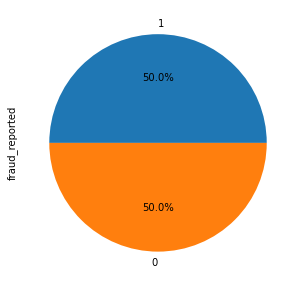

In [71]:
y_new['fraud_reported'].value_counts().plot.pie(figsize=(5,5),autopct='%.1f%%')

We can observe that now our target variable is now balanced.

# Data Standadization

In [72]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_x=sc.fit_transform(x_new)
sc_x=pd.DataFrame(sc_x,columns=x_new.columns)
sc_x

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,Month,Year,Day
0,1.133508,1.066046,1.351061,0.254431,-0.250531,0.658908,-0.549921,-0.500836,1.274242,0.651758,...,0.670474,-0.236495,1.146939,0.700235,0.959151,-1.747239,-0.178326,1.177755,1.819619,0.170197
1,0.213685,0.373189,0.091966,0.254431,1.465393,-0.253431,1.984215,-0.467615,1.274242,0.651758,...,-2.015690,-1.460869,-1.502074,-2.038698,0.438711,-0.696002,0.356298,-0.077295,0.656669,1.355747
2,-0.650949,-1.128001,1.351061,-1.048878,1.465393,0.686014,1.984215,-1.093978,-0.784780,1.746013,...,-0.821570,0.017782,-0.837657,-0.933989,-0.602169,1.024204,0.356298,-0.077295,-0.215543,-0.778244
3,0.471235,0.257713,-1.167129,0.254431,1.465393,0.697326,2.143001,1.608653,-0.784780,1.746013,...,0.339043,-0.272820,-0.298764,0.623543,-0.862389,1.406473,1.603753,-0.391057,-1.669231,1.118637
4,0.213685,0.604141,-1.167129,1.557739,-0.250531,1.429016,2.143001,1.643897,1.274242,-1.536753,...,-1.957962,-1.349756,-1.530209,-1.980051,-1.643050,1.119771,0.712714,-0.077295,1.819619,-1.133909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,-0.025469,-0.319668,-1.167129,-1.048878,1.465393,-0.413460,-0.549921,0.015642,1.274242,0.651758,...,0.124925,-0.339060,-0.365855,0.359405,-0.862389,-0.887136,0.178090,0.236468,-0.506281,1.000082
1502,1.124310,0.950569,-1.167129,0.254431,0.871683,-0.224398,-0.549921,-0.779072,-0.784780,-0.442498,...,-0.711403,-0.901460,-0.200076,-0.703630,-1.382829,1.215338,-0.712950,-0.704819,-0.070175,-1.015354
1503,0.894354,0.604141,1.351061,-1.048878,-0.250531,-0.186185,-0.549921,-0.437196,-0.784780,-1.536753,...,-0.750722,-1.627537,-1.412042,-0.251202,-1.382829,-1.364971,-1.247574,-1.332344,0.656669,0.051641
1504,-0.549768,-0.666096,0.091966,-1.048878,0.876831,-0.311454,1.116133,0.076320,-0.784780,-0.442498,...,1.081351,-0.125383,0.815163,1.331255,0.438711,-0.122600,0.178090,-0.704819,-0.506281,-0.422579


# PCA

In [73]:
from sklearn.decomposition import PCA
testPCA=PCA()
Y=testPCA.fit(sc_x)

#Checking the cumulative sum of the explained variance ratio

var_cumu=np.cumsum(Y.explained_variance_ratio_)*100
var_cumu

array([ 10.20228276,  15.52347463,  20.10682782,  24.51829535,
        28.11282008,  31.427563  ,  34.62008283,  37.80811934,
        40.9255654 ,  43.9402781 ,  46.92124116,  49.83660232,
        52.71287659,  55.47528823,  58.21251177,  60.89219643,
        63.44683398,  65.95781326,  68.43570869,  70.84310121,
        73.22579429,  75.55628005,  77.87251756,  80.07065499,
        82.24350085,  84.34094963,  86.40337956,  88.4334384 ,
        90.41834776,  92.36501945,  94.22361579,  95.99466199,
        97.67191181,  98.83579325,  99.43162789,  99.81470678,
        99.99999401, 100.        ])

The variance above shows the number of components in relation to the data we will get.We take 32 components with a variation rate of 95.96%

In [74]:
FinalPCA=PCA(n_components=32)
final_x=FinalPCA.fit_transform(sc_x)
final_x=pd.DataFrame(final_x)
final_x

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.311062,1.549969,1.155271,2.773311,3.062961,-0.205906,1.059013,-0.079363,-0.254922,0.687753,...,-0.996592,1.097687,-1.348434,0.424639,-0.383413,2.198217,-0.416067,1.148466,-0.404685,-0.098225
1,-4.195921,0.750764,0.392143,-0.395659,0.143323,-0.644924,0.554996,-1.368590,0.705702,-0.631444,...,-0.950380,0.182045,0.001636,0.476017,-0.182267,0.662361,-0.074615,-0.597562,0.770616,-1.205585
2,-0.896312,-0.970791,-1.481442,-0.231919,-1.799745,1.304116,1.020394,-0.555444,-0.177184,2.028882,...,-0.784452,-0.905054,0.479728,-1.678185,-0.755193,-0.227499,-0.275677,0.299186,1.814313,0.585157
3,-0.013461,0.980648,0.843206,-2.256119,-2.408912,-0.248270,2.793249,-1.533517,-1.079031,1.230550,...,0.500329,1.719486,1.423995,0.276668,0.341154,-0.540332,-0.306673,0.896844,-0.365326,1.595753
4,-3.477621,1.296004,0.044963,-1.984493,-2.071667,0.932522,0.629618,2.671914,1.383658,1.461759,...,0.268068,0.866635,-0.590600,1.787814,2.442924,0.379656,0.160101,-0.589742,-1.452442,0.571502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,-0.090141,-0.463401,0.735269,-2.591031,1.004806,-1.124572,0.830998,-0.884408,-0.763972,-0.632697,...,-0.793848,0.376864,-0.879146,-0.516715,1.421657,0.250067,0.632921,0.519718,0.553865,-0.325829
1502,-0.427814,1.589018,-1.727082,-1.564804,-1.369965,-1.189530,-0.368212,1.339925,-1.477912,-0.821189,...,0.313705,-0.466874,1.193678,0.093493,0.756285,0.131167,-0.597147,-0.578694,0.104887,0.313546
1503,-1.307573,1.090710,-0.217158,-1.543523,1.546531,0.016230,-0.812190,2.435711,0.102907,0.078649,...,-0.196284,-1.882616,-0.329244,-0.785962,-1.073063,-0.414005,-1.186186,-0.952042,0.063876,-0.429797
1504,0.909526,-0.960088,1.487359,-1.892870,0.867697,0.716270,0.601037,0.645994,-1.329812,1.441152,...,0.332666,0.876604,0.498442,-0.656915,-1.880034,0.566220,0.078728,-0.381543,-0.070521,0.089803


Above shown is our final dataset after the PCA

In [75]:
x=final_x
x

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.311062,1.549969,1.155271,2.773311,3.062961,-0.205906,1.059013,-0.079363,-0.254922,0.687753,...,-0.996592,1.097687,-1.348434,0.424639,-0.383413,2.198217,-0.416067,1.148466,-0.404685,-0.098225
1,-4.195921,0.750764,0.392143,-0.395659,0.143323,-0.644924,0.554996,-1.368590,0.705702,-0.631444,...,-0.950380,0.182045,0.001636,0.476017,-0.182267,0.662361,-0.074615,-0.597562,0.770616,-1.205585
2,-0.896312,-0.970791,-1.481442,-0.231919,-1.799745,1.304116,1.020394,-0.555444,-0.177184,2.028882,...,-0.784452,-0.905054,0.479728,-1.678185,-0.755193,-0.227499,-0.275677,0.299186,1.814313,0.585157
3,-0.013461,0.980648,0.843206,-2.256119,-2.408912,-0.248270,2.793249,-1.533517,-1.079031,1.230550,...,0.500329,1.719486,1.423995,0.276668,0.341154,-0.540332,-0.306673,0.896844,-0.365326,1.595753
4,-3.477621,1.296004,0.044963,-1.984493,-2.071667,0.932522,0.629618,2.671914,1.383658,1.461759,...,0.268068,0.866635,-0.590600,1.787814,2.442924,0.379656,0.160101,-0.589742,-1.452442,0.571502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,-0.090141,-0.463401,0.735269,-2.591031,1.004806,-1.124572,0.830998,-0.884408,-0.763972,-0.632697,...,-0.793848,0.376864,-0.879146,-0.516715,1.421657,0.250067,0.632921,0.519718,0.553865,-0.325829
1502,-0.427814,1.589018,-1.727082,-1.564804,-1.369965,-1.189530,-0.368212,1.339925,-1.477912,-0.821189,...,0.313705,-0.466874,1.193678,0.093493,0.756285,0.131167,-0.597147,-0.578694,0.104887,0.313546
1503,-1.307573,1.090710,-0.217158,-1.543523,1.546531,0.016230,-0.812190,2.435711,0.102907,0.078649,...,-0.196284,-1.882616,-0.329244,-0.785962,-1.073063,-0.414005,-1.186186,-0.952042,0.063876,-0.429797
1504,0.909526,-0.960088,1.487359,-1.892870,0.867697,0.716270,0.601037,0.645994,-1.329812,1.441152,...,0.332666,0.876604,0.498442,-0.656915,-1.880034,0.566220,0.078728,-0.381543,-0.070521,0.089803


In [76]:
y=y_new
x.shape,y.shape

((1506, 32), (1506, 1))

# Model Building

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,f1_score,roc_curve,auc


In [78]:
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    DTC=DecisionTreeClassifier()
    DTC.fit(x_train,y_train)
    pred=DTC.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Accuracy is",maxAccu,"on Random_state",maxRS)    

Best Accuracy is 0.7389380530973452 on Random_state 97


# Creating train test split

In [96]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=130)

In [99]:
lg=LogisticRegression()
sv=SVC(probability=True)
knn=KNeighborsClassifier(n_neighbors=5)
rfc=RandomForestClassifier(n_estimators=100)
dtc=DecisionTreeClassifier()
gnb=GaussianNB()
adc=AdaBoostClassifier(n_estimators=100)

model=[lg,sv,knn,rfc,dtc,gnb,adc]
Test=[]

for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('Accuracy score of',m)
    print(accuracy_score(y_test,pred))
    Test.append(acc)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print('----------------------------------------------------------')

Accuracy score of LogisticRegression()
0.8145695364238411
[[131  34]
 [ 22 115]]
              precision    recall  f1-score   support

           0       0.86      0.79      0.82       165
           1       0.77      0.84      0.80       137

    accuracy                           0.81       302
   macro avg       0.81      0.82      0.81       302
weighted avg       0.82      0.81      0.81       302

----------------------------------------------------------
Accuracy score of SVC(probability=True)
0.847682119205298
[[143  22]
 [ 24 113]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       165
           1       0.84      0.82      0.83       137

    accuracy                           0.85       302
   macro avg       0.85      0.85      0.85       302
weighted avg       0.85      0.85      0.85       302

----------------------------------------------------------
Accuracy score of KNeighborsClassifier()
0.6258278145695364
[[ 54 

From above we can observe that RandomForest has performed well with 83% accuracy

# Cross Validation

In [100]:
cv=[]
for m in model:
    score=cross_val_score(m,x,y,cv=5)
    cv.append(score.mean())
    print('Mean Accuracy of',m)
    print(score.mean())
    print('-------------------------------------------------------')

Mean Accuracy of LogisticRegression()
0.7364964467228444
-------------------------------------------------------
Mean Accuracy of SVC(probability=True)
0.8182152207872214
-------------------------------------------------------
Mean Accuracy of KNeighborsClassifier()
0.6819783943147566
-------------------------------------------------------
Mean Accuracy of RandomForestClassifier()
0.7996083694528174
-------------------------------------------------------
Mean Accuracy of DecisionTreeClassifier()
0.6740687773646344
-------------------------------------------------------
Mean Accuracy of GaussianNB()
0.7796748146355416
-------------------------------------------------------
Mean Accuracy of AdaBoostClassifier(n_estimators=100)
0.7604277133616422
-------------------------------------------------------


RFC is the only model with 80% score on cross validation

# ROC_AUC score

In [101]:
def plot_roc_cur(fper,tper):
    plt.plot(fper,tper,color='orange',label='ROC')
    plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
    plt.xlabel('False PositiveRate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) curve')
    plt.legend()
    plt.show()

ROC_AUC score of LogisticRegression()
0.8166777261667773


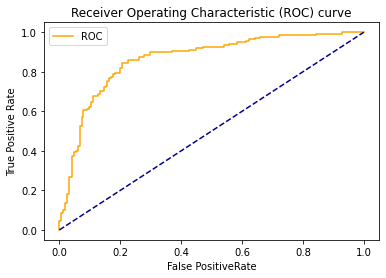

--------------------------------------------------------------
ROC_AUC score of SVC(probability=True)
0.8457420924574209


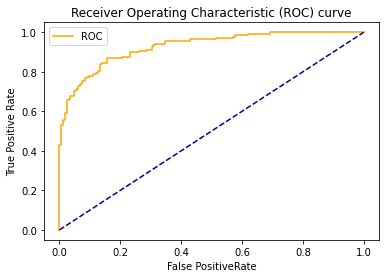

--------------------------------------------------------------
ROC_AUC score of KNeighborsClassifier()
0.656337093563371


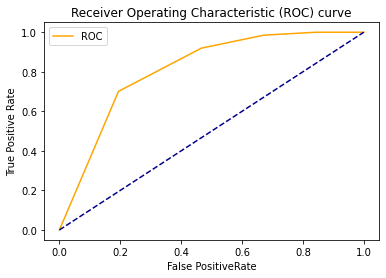

--------------------------------------------------------------
ROC_AUC score of RandomForestClassifier()
0.8372705153727051


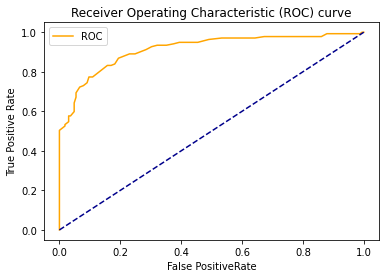

--------------------------------------------------------------
ROC_AUC score of DecisionTreeClassifier()
0.737137801371378


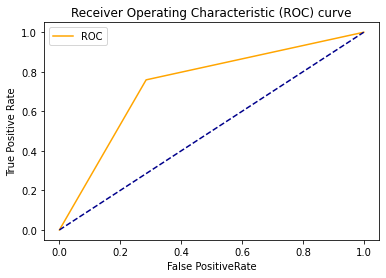

--------------------------------------------------------------
ROC_AUC score of GaussianNB()
0.8044901570449016


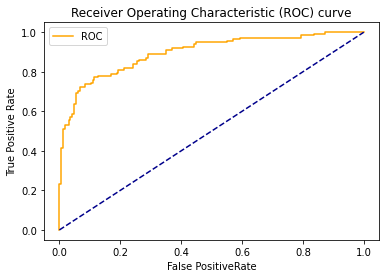

--------------------------------------------------------------
ROC_AUC score of AdaBoostClassifier(n_estimators=100)
0.7851360318513604


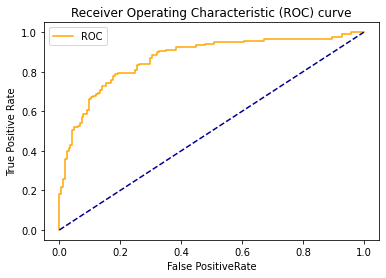

--------------------------------------------------------------


In [103]:
auc=[]
for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    score=roc_auc_score(y_test,pred)
    auc.append(score)
    print('ROC_AUC score of',m)
    print(score)
    probs=m.predict_proba(x_test)
    probs=probs[:,1]
    fper,tper,thresholds=roc_curve(y_test,probs)
    plot_roc_cur(fper,tper)
    print('--------------------------------------------------------------')
         

In [105]:
Performance={'Model':['LogisticRegression','SVC','KNeighborsClassifier','RandomForestClassifier','DecisionTreeClassifier','GaussianNB','AdaBoostClassifier'],
              'Test Score':Test,'CrossValidationScore':cv,'ROC AUC Score':auc}
Performance=pd.DataFrame(data=Performance)
Performance

,Model,Test Score,CrossValidationScore,ROC AUC Score
0,LogisticRegression,0.814570,0.736496,0.816678
1,SVC,0.847682,0.818215,0.845742
2,KNeighborsClassifier,0.625828,0.681978,0.656337
3,RandomForestClassifier,0.837748,0.799608,0.837271
4,DecisionTreeClassifier,0.745033,0.674069,0.737138
5,GaussianNB,0.804636,0.779675,0.804490
6,AdaBoostClassifier,0.781457,0.760428,0.785136


We can conclude that RFC and GaussianNB has performed well with less overfitting and underfitting

# Hyper Parameter Tuning with RFC

In [106]:
from sklearn.model_selection import GridSearchCV
rfc.get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [109]:
parameters={'max_features':['auto','sqrt','log2'],
             'max_depth':[4,5,6,7,8],
              'criterion':['gini','entropy']}
gcv=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring='accuracy')
gcv.fit(x_train,y_train)
gcv.best_params_

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2'}

Random Forest classifier Performance after HyperTuning
---------------------------------------------------------
Accuracy Score 77.48344370860927
Cross Validation Score 75.84079558205539
AUC ROC Score 77.72174297721743


AUC ROC Curve with Final Mod


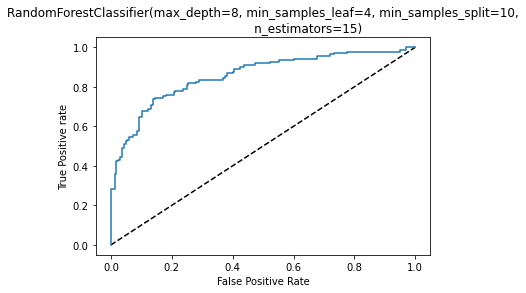

In [113]:
Finalmod=RandomForestClassifier(criterion='gini',max_depth=8,min_samples_leaf=4,min_samples_split=10,n_estimators=15)
Finalmod.fit(x_train,y_train)
pred1=Finalmod.predict(x_test)
acc1=accuracy_score(y_test,pred1)

cvs1=cross_val_score(Finalmod,x,y,cv=5)
y_pred_prob=Finalmod.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
auc_score1=roc_auc_score(y_test,Finalmod.predict(x_test))

print('Random Forest classifier Performance after HyperTuning')
print('---------------------------------------------------------')
print('Accuracy Score',acc1*100)
print('Cross Validation Score',cvs1.mean()*100)
print('AUC ROC Score',auc_score1*100)
print('\n')
print('AUC ROC Curve with Final Mod')
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=RandomForestClassifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.title(Finalmod)
plt.show()
      

# Save the model

In [114]:
import joblib
joblib.dump(Finalmod,'Insurance.pk1')

['Insurance.pk1']

# Conclusion

This project has built a model that can detect auto insurance fraud.In doing so the model can reduces losses for insurance companies.The challenge behind fraud detection in machine learning is that fruds are far less common as compared to legit insurance claims